<a href="https://colab.research.google.com/github/Ihsanalmasry/MachingLearning_Lab4_IHSAN-ALMASRY/blob/main/MLF_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

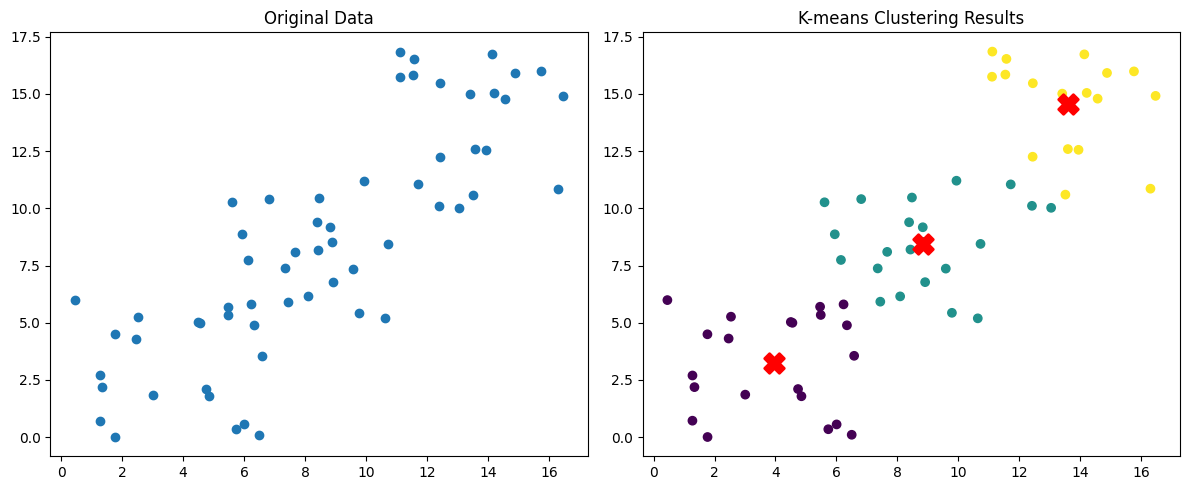

Final centroids:
[[ 3.94687552  3.22672218]
 [ 8.85422796  8.46194624]
 [13.58564413 14.56674125]]

Final objective value: 442.0234
Number of points in each cluster: [21 22 17]


In [1]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans


# Uploading k_mean_points.npy to Colab
loaded_points = np.load('/content/sample_data/k_mean_points.npy')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(loaded_points[:, 0], loaded_points[:, 1])
plt.title('Original Data')

k = 3

def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    ###################################
    # Write your own code here #
    shuffled_indices = np.random.permutation(len(points))
    initial_clusters = points[shuffled_indices[:k_clusters]]
    ###################################
    return initial_clusters

def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    ###################################
    # Write your own code here #
    distances_array = norm(points - centroid, axis=1)
    ###################################
    return distances_array

def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    ###################################
    # Write your own code here #
    distances_array = np.array([calculate_metric(points, centroid) for centroid in centroids_points])
    ###################################
    return distances_array

def assign_centroids(distances: np.ndarray) -> np.ndarray:
    ###################################
    # Write your own code here #
    assigned_centroids = np.argmin(distances, axis=0)
    ###################################
    return assigned_centroids

def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    ###################################
    # Write your own code here #
    objective_function_value = np.sum(distances[assigned_centroids, np.arange(len(assigned_centroids))]**2)
    ###################################
    return objective_function_value

def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    ###################################
    # Write your own code here #
    new_clusters = np.array([points[assigned_centroids == k].mean(axis=0) for k in range(k_clusters)])
    ###################################
    return new_clusters

def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int = 100, error: float = 0.001) -> tuple:
    ###################################
    # Write your own code here #
    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = float('inf')

    for _ in range(n_of_iterations):
        distances = compute_distances(points, centroid_points)
        assigned = assign_centroids(distances)
        current_objective = calculate_objective(assigned, distances)

        if abs(last_objective - current_objective) < error:
            break

        last_objective = current_objective
        centroid_points = calculate_new_centroids(points, assigned, k_clusters)
    ###################################
    return centroid_points, last_objective

# Running K-means algorithm
final_centroids, final_objective = fit(loaded_points, k)

# Getting cluster assignments for visualization
distances = compute_distances(loaded_points, final_centroids)
assignments = assign_centroids(distances)


plt.subplot(1, 2, 2)
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], c=assignments)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, c='red', linewidths=2)
plt.title('K-means Clustering Results')
plt.tight_layout()
plt.show()


print("Final centroids:")
print(final_centroids)
print(f"\nFinal objective value: {final_objective:.4f}")
print(f"Number of points in each cluster: {np.bincount(assignments)}")

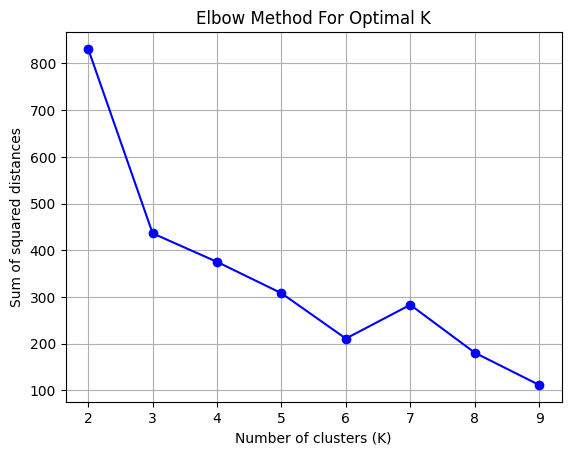

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

# Reusing the K-means functions from Exercise 1
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    shuffled_indices = np.random.permutation(len(points))
    return points[shuffled_indices[:k_clusters]]

def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    return norm(points - centroid, axis=1)

def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    return np.array([calculate_metric(points, centroid) for centroid in centroids_points])

def assign_centroids(distances: np.ndarray) -> np.ndarray:
    return np.argmin(distances, axis=0)

def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    return np.sum(distances[assigned_centroids, np.arange(len(assigned_centroids))]**2)

def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    return np.array([points[assigned_centroids == k].mean(axis=0) for k in range(k_clusters)])

def fit(points: np.ndarray, k_clusters: int, n_of_iterations: int = 100, error: float = 0.001) -> tuple:
    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = float('inf')

    for _ in range(n_of_iterations):
        distances = compute_distances(points, centroid_points)
        assigned = assign_centroids(distances)
        current_objective = calculate_objective(assigned, distances)

        if abs(last_objective - current_objective) < error:
            break

        last_objective = current_objective
        centroid_points = calculate_new_centroids(points, assigned, k_clusters)

    return centroid_points, last_objective

# Loading the data
loaded_points = np.load('/content/sample_data/k_mean_points.npy')

# Elbow Method Implementation
k_all = range(2, 10)
all_objective = []

for k in k_all:
    _, objective = fit(loaded_points, k)
    all_objective.append(objective)

# Plotting the elbow curve
plt.figure()
plt.plot(k_all, all_objective, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

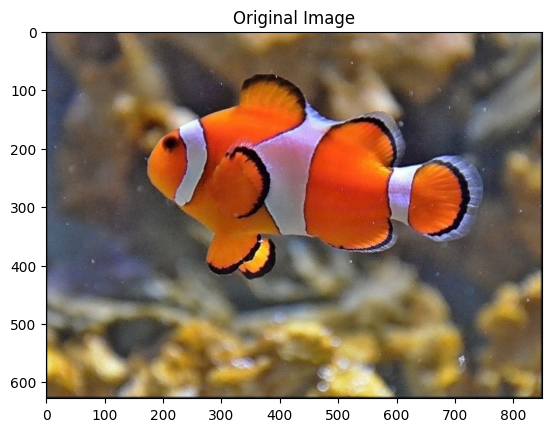

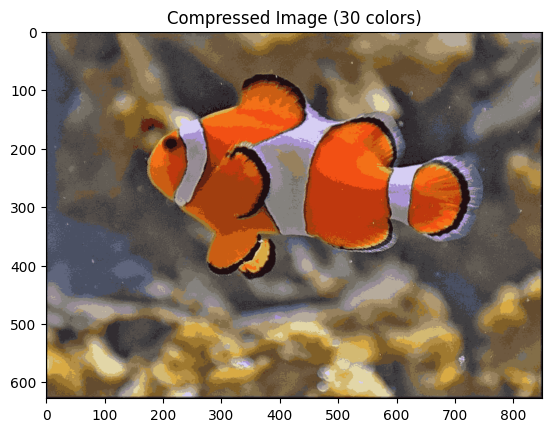

In [21]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


loaded_image = imread('/content/sample_data/fish.jpg')
plt.imshow(loaded_image)
plt.title('Original Image')
plt.show()

def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """

    # Reshaping image to 2D array (pixels × color channels)
    h, w, c = image.shape
    pixels = image.reshape(-1, c).astype(np.float32)

    # Applying K-means clustering
    kmeans = KMeans(n_clusters=number_of_colours, random_state=0).fit(pixels)

    # Getting compressed colors (centroids)
    compressed_colors = kmeans.cluster_centers_.astype(np.uint8)

    # Replacing each pixel with its nearest centroid color
    compressed_pixels = compressed_colors[kmeans.labels_]

    # Reshaping back to original image dimensions
    compressed_image = compressed_pixels.reshape(h, w, c)


    return compressed_image


img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.title(f'Compressed Image ({30} colors)')
plt.show()